# Trabajando con data reducida

In [467]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [468]:
df = pd.read_csv('datasets/Data_Reducida.csv')
df

,HaComprado,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Cluster,Latitud,Longitud,Ubicacion,CategoriaProductoFavorito
0,1,2.607769,354.238240,73.154439,257.470986,2,41.911252,12.501644,Rome,Electrónica
1,1,5.692095,247.349866,139.003909,35.335695,0,59.331134,18.062440,Stockholm,Moda
2,1,5.626180,314.977616,32.056281,45.524701,2,59.332634,18.071068,Stockholm,Electrónica
3,0,47.140577,225.669044,64.074231,184.954799,1,40.422948,-3.704413,Madrid,Libros
4,1,61.676897,278.430570,210.712576,92.810190,0,48.857746,2.345578,Paris,Electrónica
...,...,...,...,...,...,...,...,...,...,...
195,1,61.569749,341.746413,42.261339,129.642799,2,52.528639,13.409293,Berlin,Hogar
196,0,25.426559,282.578068,117.751123,282.578068,1,40.392115,-3.693188,Madrid,Electrónica
197,1,6.141810,305.755382,8.530414,57.980584,2,52.358882,4.906023,Amsterdam,Electrónica
198,1,15.019298,324.730833,73.100675,203.649838,2,59.334092,18.062819,Stockholm,Alimentos


In [469]:
# Data para cluster

df.drop(columns=['Latitud', 'Longitud', 'Ubicacion', 'CategoriaProductoFavorito', 'HaComprado'], inplace= True)

In [470]:
df.groupby('Cluster').mean()

,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value
Cluster,,,,
0,42.830554,328.587682,130.358830,76.668006
1,51.646489,301.880937,56.148621,198.964259
2,46.832645,303.320445,34.482128,118.977997


In [471]:
df['Cluster'].value_counts()

2    122
1     42
0     36
Name: Cluster, dtype: int64

In [472]:
# Cluster 0 cliente que compra poco y gasta poco

# Cluster 1 cliente que compra poco y gasta mucho

# Cluster 2 cliente que compra mucho y gasta poco

In [473]:
df['GastoMensual'][df['Cluster'] == 0].min()

# Bajar el gasto mensual de los clientes del cluster 1 cuando el gasto mensual es mayor a 105, restar menos 150

df['GastoMensual'] = np.where((df['Cluster'] == 0) & (df['GastoMensual'] > 110), df['GastoMensual'] - 150, df['GastoMensual'])

In [474]:
df['Average_Days_Between_Purchases'][df['Cluster'] == 2].min()


0.5503024961536188

In [475]:
# Bajar el Monthly_Spending_Std de los clientes del cluster 0, restar 70 cuando el Monthly_Spending_Std es mayor a 70

df['Monthly_Spending_Std'] = np.where((df['Cluster'] == 0) & (df['Monthly_Spending_Std'] > 70), df['Monthly_Spending_Std'] - 70, df['Monthly_Spending_Std'])

In [476]:
# Reducir el Average_Transaction_Value de los clientes del cluster 0, restar 50 cuando el Average_Transaction_Value es mayor a 50

df['Average_Transaction_Value'] = np.where((df['Cluster'] == 0) & (df['Average_Transaction_Value']
    > 50), df['Average_Transaction_Value'] - 50, df['Average_Transaction_Value'])

In [477]:
# Aumentar el Average_Days_Between_Purchases de los clientes del cluster 1, sumar 40 a todos

df['Average_Days_Between_Purchases'] = np.where((df['Cluster'] == 1), df['Average_Days_Between_Purchases'] + 40, df['Average_Days_Between_Purchases'])

In [478]:
# Aumentar GastoMensual de los clientes del cluster 1, sumar 300 a todos

df['GastoMensual'] = np.where((df['Cluster'] == 1), df['GastoMensual'] + 300, df['GastoMensual'])

# Aumentar Monthly_Spending_Std de los clientes del cluster 1, sumar 100 a todos

df['Monthly_Spending_Std'] = np.where((df['Cluster'] == 1), df['Monthly_Spending_Std'] + 100, df['Monthly_Spending_Std'])



In [479]:
# Aumentar Average_Transaction_Value de los clientes del cluster 1, sumar 600 a todos

df['Average_Transaction_Value'] = np.where((df['Cluster']
    == 1), df['Average_Transaction_Value'] + 600, df['Average_Transaction_Value'])

In [480]:
# Disminuir Average_Days_Between_Purchases de los clientes del cluster 2, restar 30 a todos cuando el Average_Days_Between_Purchases es mayor a 30

df['Average_Days_Between_Purchases'] = np.where((df['Cluster'] == 2) & (df['Average_Days_Between_Purchases'] > 30), df['Average_Days_Between_Purchases'] - 30, df['Average_Days_Between_Purchases'])


In [481]:
# Disminuir Average_Days_Between_Purchases de los clientes del cluster 2, restar 20 a todos cuando el Average_Days_Between_Purchases es mayor a 20

df['Average_Days_Between_Purchases'] = np.where((df['Cluster'] == 2) & (df['Average_Days_Between_Purchases'] > 20), df['Average_Days_Between_Purchases'] - 20, df['Average_Days_Between_Purchases'])


In [482]:
# Disminuir Average_Days_Between_Purchases de los clientes del cluster 2, restar 20 a todos cuando el Average_Days_Between_Purchases es mayor a 10

df['Average_Days_Between_Purchases'] = np.where((df['Cluster'] == 2) & (df['Average_Days_Between_Purchases'] > 20), df['Average_Days_Between_Purchases'] - 20, df['Average_Days_Between_Purchases'])

In [483]:
# Disminuir GastoMensual de los clientes del cluster 2, restar 60 a todos cuando el GastoMensual es mayor a 60

df['GastoMensual'] = np.where((df['Cluster'] == 2) & (df['GastoMensual'] > 60), df['GastoMensual'] - 60, df['GastoMensual'])


In [484]:
# Disminuir el Average_Transaction_Value de los clientes del cluster 2, restar 100 a todos cuando el Average_Transaction_Value es mayor a 100

df['Average_Transaction_Value'] = np.where((df['Cluster'] == 2) & (df['Average_Transaction_Value'] > 100), df['Average_Transaction_Value']
    - 100, df['Average_Transaction_Value'])

In [485]:
# Disminuir el Average_Transaction_Value de los clientes del cluster 2, restar 60 a todos cuando el Average_Transaction_Value es mayor a 60

df['Average_Transaction_Value'] = np.where((df['Cluster'] == 2) & (df['Average_Transaction_Value']
    > 60), df['Average_Transaction_Value'] - 60, df['Average_Transaction_Value'])


In [486]:
# Disminuir el GastoMensual de los clientes del cluster 2, restar 150 a todos cuando el GastoMensual es mayor a 150

df['GastoMensual'] = np.where((df['Cluster'] == 2) & (df['GastoMensual'] > 150), df['GastoMensual'] - 150, df['GastoMensual'])

In [487]:
# Disminuir el GastoMensual de los clientes del cluster 2, restar 60 a todos cuando el GastoMensual es mayor a 60

df['GastoMensual'] = np.where((df['Cluster'] == 2) & (df['GastoMensual'] > 60), df['GastoMensual'] - 60, df['GastoMensual'])

In [488]:
# Disminuir el Average_Transaction_Value de los clientes del cluster 2, restar 20 a todos cuando el Average_Transaction_Value es mayor a 20

df['Average_Transaction_Value'] = np.where((df['Cluster'] == 2) & (df['Average_Transaction_Value']
    > 20), df['Average_Transaction_Value'] - 20, df['Average_Transaction_Value'])

In [489]:
# Disminuir el Average_Transaction_Value de los clientes del cluster 2, restar 10 a todos cuando el Average_Transaction_Value es mayor a 10

df['Average_Transaction_Value'] = np.where((df['Cluster'] == 2) & (df['Average_Transaction_Value']
    > 10), df['Average_Transaction_Value'] - 10, df['Average_Transaction_Value'])

In [490]:
# Hacemos clusterizacion
df.drop(columns=['Cluster'], inplace= True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3)

df['Cluster'] = kmeans.fit_predict(df_scaled)

df.groupby('Cluster').mean()

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value
Cluster,,,,
0,14.783705,90.894172,39.777868,26.433612
1,91.646489,601.880937,156.148621,798.964259
2,131.680416,100.353531,47.072812,17.114625


In [491]:

df.groupby('Cluster').mean()

,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value
Cluster,,,,
0,14.783705,90.894172,39.777868,26.433612
1,91.646489,601.880937,156.148621,798.964259
2,131.680416,100.353531,47.072812,17.114625


<Axes: xlabel='pca1', ylabel='pca2'>

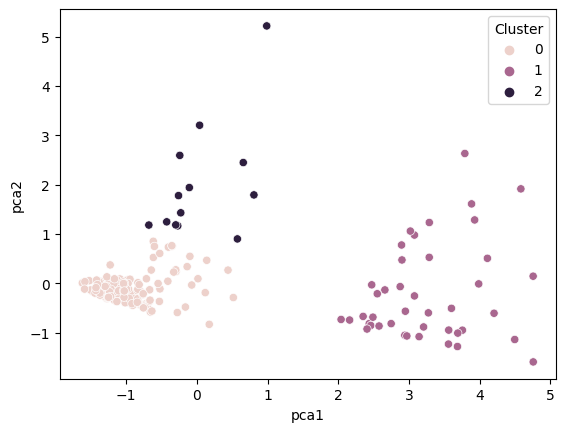

In [492]:
# Hacemos pca para visualizar

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=df_pca, columns=['pca1', 'pca2'])

df_pca['Cluster'] = df['Cluster']

sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=df_pca)

In [493]:
df['Cluster'].value_counts()

0    145
1     42
2     13
Name: Cluster, dtype: int64

In [494]:
# Hacemos pca de 3 componentes

pca = PCA(n_components=3)

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=df_pca, columns=['pca1', 'pca2', 'pca3'])

df_pca['Cluster'] = df['Cluster']

fig = px.scatter_3d(df_pca, x='pca1', y='pca2', z='pca3', color='Cluster')

fig.show()

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\py

<Axes: >

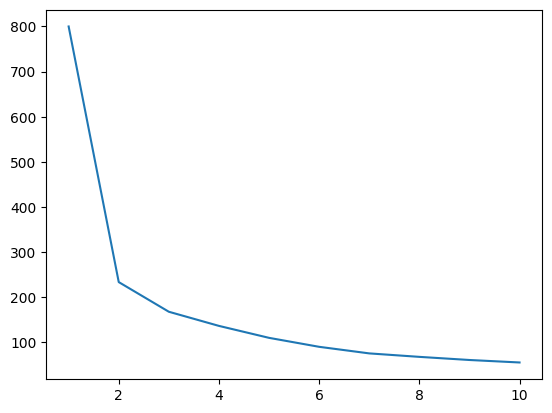

In [495]:
# Metodo del codo

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=inertia)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\py

<Axes: >

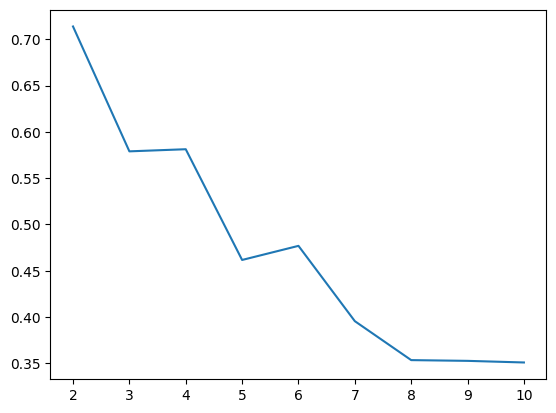

In [496]:
# Metodo de la silueta

from sklearn.metrics import silhouette_score

silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    silhouette.append(silhouette_score(df_scaled, kmeans.predict(df_scaled)))

sns.lineplot(x=range(2, 11), y=silhouette)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: xlabel='pca1', ylabel='pca2'>

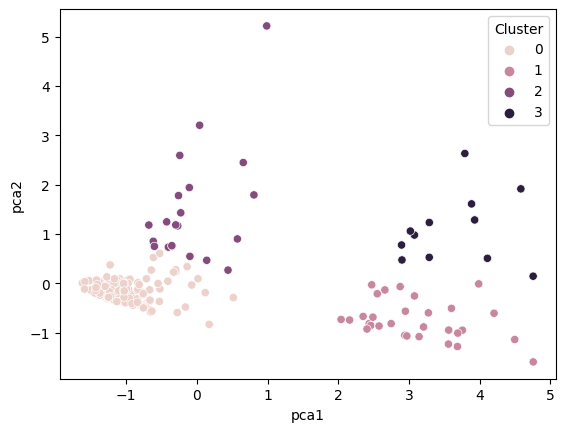

In [497]:
# Hacemos clusterizacion con 4 clusters

kmeans = KMeans(n_clusters=4)

df['Cluster'] = kmeans.fit_predict(df_scaled)

df.groupby('Cluster').mean()

# Hacemos pca para visualizar

pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=df_pca, columns=['pca1', 'pca2'])

df_pca['Cluster'] = df['Cluster']

sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=df_pca)

In [498]:
df['Cluster'].value_counts()

0    137
1     30
2     21
3     12
Name: Cluster, dtype: int64

In [561]:
df.groupby('Cluster').min()

,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Latitud,Longitud,Ubicacion,CategoriaProductoFavorito,CategoríaProductoFavorito
Cluster,,,,,,,,,
0,0.051906,0.302177,-16.274245,-5.860661,38.706689,-9.163325,Amsterdam,Alimentos,Deporte
1,41.804758,490.004904,61.321857,608.737720,38.701571,-9.146229,Amsterdam,Alimentos,Deporte
2,60.327726,5.656549,8.681839,1.933220,38.694695,-9.164806,Berlin,Electrónica,Deporte
3,113.842083,407.964812,56.435867,655.113735,38.742074,-9.161278,Berlin,Alimentos,Electrónica


In [500]:
df_2 = pd.read_csv('datasets/Data_Reducida_Final.csv')

In [501]:
df[['Latitud', 'Longitud', 'Ubicacion', 'CategoriaProductoFavorito']] = df_2[['Latitud', 'Longitud', 'Ubicacion', 'CategoriaProductoFavorito']]

In [502]:
# df.to_csv('datasets/Data_Reducida_Final.csv', index=False)

In [503]:
df

,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Cluster,Latitud,Longitud,Ubicacion,CategoriaProductoFavorito
0,2.607769,84.238240,73.154439,67.470986,0,41.911252,12.501644,Rome,Electrónica
1,5.692095,97.349866,69.003909,35.335695,0,59.331134,18.062440,Stockholm,Moda
2,5.626180,44.977616,32.056281,15.524701,0,59.332634,18.071068,Stockholm,Electrónica
3,87.140577,525.669044,164.074231,784.954799,1,40.422948,-3.704413,Madrid,Libros
4,61.676897,128.430570,140.712576,42.810190,2,48.857746,2.345578,Paris,Electrónica
...,...,...,...,...,...,...,...,...,...
195,11.569749,71.746413,42.261339,9.642799,0,52.528639,13.409293,Berlin,Hogar
196,65.426559,582.578068,217.751123,882.578068,1,40.392115,-3.693188,Madrid,Electrónica
197,6.141810,35.755382,8.530414,27.980584,0,52.358882,4.906023,Amsterdam,Electrónica
198,15.019298,54.730833,73.100675,13.649838,0,59.334092,18.062819,Stockholm,Alimentos


In [514]:
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24252\1014496128.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Latitud,Longitud
Cluster,,,,,,
0,11.927355,87.195831,38.585096,26.570771,48.526403,7.179174
1,64.685830,604.473678,161.470136,803.848117,47.626241,3.953632
2,105.782621,120.877238,52.075202,19.769911,47.182234,6.035017
3,159.048136,595.399085,142.844834,786.754612,43.207841,-0.112713


In [519]:
categorias = ["Electrónica", "Moda", "Libros", "Hogar", "Deporte"]

# Distribuir las categorías específicamente entre los clusters
np.random.seed(42)
df['CategoríaProductoFavorito'] = df['Cluster'].apply(
    lambda x: np.random.choice(
        categorias,
        p=[0.1, 0.6, 0, 0.1, 0.2] if x == 0 else
          [0.6, 0.2, 0, 0.1, 0.1] if x == 1 else
          [0.6, 0, 0.2, 0, 0.2] if x == 2 else
          [0.1, 0.1, 0.4, 0.2, 0.2]
    )
)

In [506]:
df_2 = pd.read_csv('datasets/Data_Reducida_Final.csv')

df['CategoriaProductoFavorito'] = df_2['CategoriaProductoFavorito']


In [507]:
df

,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Cluster,Latitud,Longitud,Ubicacion,CategoriaProductoFavorito
0,2.607769,84.238240,73.154439,67.470986,0,41.911252,12.501644,Rome,Electrónica
1,5.692095,97.349866,69.003909,35.335695,0,59.331134,18.062440,Stockholm,Moda
2,5.626180,44.977616,32.056281,15.524701,0,59.332634,18.071068,Stockholm,Electrónica
3,87.140577,525.669044,164.074231,784.954799,1,40.422948,-3.704413,Madrid,Libros
4,61.676897,128.430570,140.712576,42.810190,2,48.857746,2.345578,Paris,Electrónica
...,...,...,...,...,...,...,...,...,...
195,11.569749,71.746413,42.261339,9.642799,0,52.528639,13.409293,Berlin,Hogar
196,65.426559,582.578068,217.751123,882.578068,1,40.392115,-3.693188,Madrid,Electrónica
197,6.141810,35.755382,8.530414,27.980584,0,52.358882,4.906023,Amsterdam,Electrónica
198,15.019298,54.730833,73.100675,13.649838,0,59.334092,18.062819,Stockholm,Alimentos


In [520]:
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24252\1014496128.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Latitud,Longitud
Cluster,,,,,,
0,11.927355,87.195831,38.585096,26.570771,48.526403,7.179174
1,64.685830,604.473678,161.470136,803.848117,47.626241,3.953632
2,105.782621,120.877238,52.075202,19.769911,47.182234,6.035017
3,159.048136,595.399085,142.844834,786.754612,43.207841,-0.112713


In [522]:
df['CategoriaProductoFavorito'].value_counts()

Libros         50
Electrónica    46
Moda           44
Alimentos      34
Hogar          26
Name: CategoriaProductoFavorito, dtype: int64

In [521]:
# Graficar productos favoritos por cluster

fig = px.histogram(df, x='Cluster', color='CategoriaProductoFavorito', barmode='group')

fig.show()

In [512]:
df['CategoriaProductoFavorito'][df['Cluster'] == 2].value_counts()

Libros         6
Moda           6
Hogar          6
Electrónica    3
Name: CategoriaProductoFavorito, dtype: int64

In [688]:
kmeans.predict(scaler.transform([[0, 0, 0, 0]]))

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([0])

In [510]:
# df.to_csv('datasets/Data_Reducida_Final.csv', index=False)

In [528]:
import matplotlib.pyplot as plt

In [541]:
# Mapa de correlacion con plotly
fig = px.imshow(df.drop(columns=['Cluster', 'Latitud', 'Longitud']).corr().round(2), color_continuous_scale='Cividis', title='Mapa de correlación', text_auto=True)
fig.show()


C:\Users\misla\AppData\Local\Temp\ipykernel_24252\1627778821.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [563]:
# Boxplot de las variables numéricas con plotly

df_long = df.drop(columns=['Cluster', 'Latitud', 'Longitud', 'Ubicacion', 'CategoriaProductoFavorito', 'CategoríaProductoFavorito']).melt(var_name='Variable', value_name='Value')

# Crear un boxplot con Plotly Express
fig = px.box(df_long, x='Value', y='Variable', color='Variable',
             title="Boxplot de Múltiples Variables", orientation='h')

# Mostrar el gráfico
fig.show()

In [574]:
# Crear un grafico de distribucion kde para GastoMensual con plotly express

fig = px.violin(df, x='GastoMensual', box=True, points='all', title='Distribución de Gasto Mensual por Cluster')

fig.show()



In [584]:
# Graficar productos favoritos

fig = px.histogram(df, x='CategoriaProductoFavorito', color='CategoriaProductoFavorito')

fig.show()

In [583]:
df.groupby('Cluster').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24252\1014496128.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Latitud,Longitud
Cluster,,,,,,
0,11.927355,87.195831,38.585096,26.570771,48.526403,7.179174
1,64.685830,604.473678,161.470136,803.848117,47.626241,3.953632
2,105.782621,120.877238,52.075202,19.769911,47.182234,6.035017
3,159.048136,595.399085,142.844834,786.754612,43.207841,-0.112713


In [581]:
categorias = ["Electrónica", "Moda", "Libros", "Hogar", "Deporte"]

# Distribuir las categorías específicamente entre los clusters
np.random.seed(42)
df['CategoríaProductoFavorito'] = df['Cluster'].apply(
    lambda x: np.random.choice(
        categorias,
        p=[0.1, 0.6, 0, 0.1, 0.2] if x == 0 else
          [0.6, 0.2, 0, 0.1, 0.1] if x == 1 else
          [0.1, 0.1, 0.4, 0.2, 0.2] if x == 2 else
          [0.6, 0, 0.2, 0, 0.2]
    )
)

In [653]:
cluster_4 = df[['Cluster_4', 'CategoríaProductoFavorito']]

cluster_4.to_csv('datasets/Cluster_4.csv', index=False)

In [662]:
# Compruebo si df['Cluster_4'] es igual a df['Cluster_4_2']

df['Cluster_4'].equals(df['Cluster_4_2'])

False

In [666]:
# Cambia en el cluster 4_2 el valor de 2 por 0 y el de 0 por 2

df['Cluster_4_2_2'] = df['Cluster_4_2'].apply(lambda x: 0 if x == 2 else 2 if x == 0 else x)

In [674]:
df['Cluster_4_2_2'].equals(df['Cluster_4'])

False

In [675]:
sum(df['Cluster_4_2_2'] == df['Cluster_4'])

200

In [705]:
# Graficar productos favoritos por cluster

fig = px.histogram(df, x='Cluster_4_2_2', color='CategoríaProductoFavorito', barmode='group')

fig.show()

In [704]:
fig = px.histogram(df, x='Cluster_4', color='CategoríaProductoFavorito', barmode='group')

fig.show()

In [684]:
scaler = StandardScaler()
scaler.fit(df.drop(columns=['Cluster', 'Latitud', 'Longitud', 'Ubicacion', 'CategoriaProductoFavorito', 'CategoríaProductoFavorito', 'Cluster_4', 'Cluster_4_2', 'Cluster_4_2_2']))

# Guardar el scaler con piclke

import pickle

with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [680]:
# Guardar KMeans con pickle

import pickle

with open('models/kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [686]:
# Crear el KMeans con 4 clusters

kmeans = KMeans(n_clusters=4)

# Escalar los datos

df_scaled = scaler.transform(df.drop(columns=['Cluster', 'Latitud', 'Longitud', 'Ubicacion', 'CategoriaProductoFavorito', 'CategoríaProductoFavorito', 'Cluster_4', 'Cluster_4_2', 'Cluster_4_2_2']))

# Entrenar el modelo

kmeans.fit(df_scaled)

# Guardar el modelo

import pickle

with open('models/kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [685]:
kmeans.pre

KMeans(n_clusters=4, random_state=42)

C:\Users\misla\AppData\Local\Temp\ipykernel_24032\1592404474.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



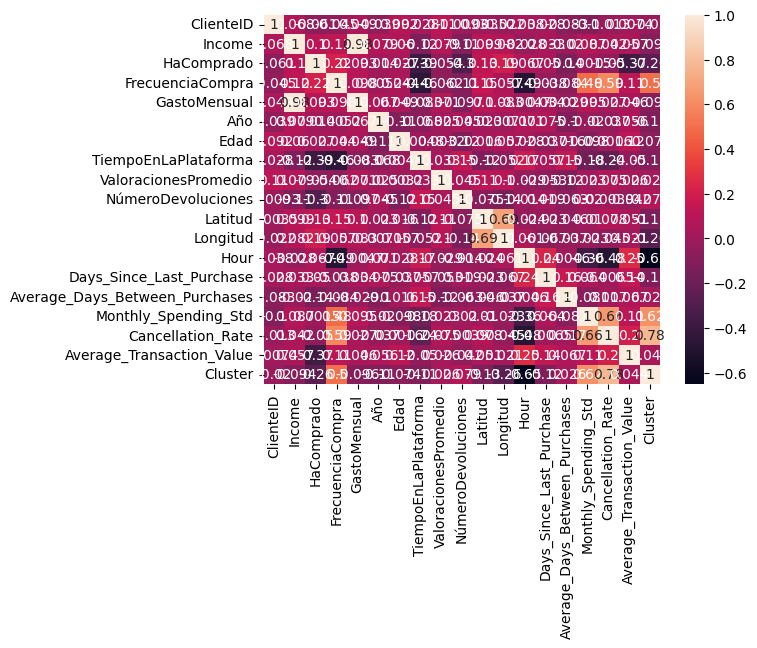

In [ ]:
sns.heatmap(clientes_clusters.corr(), annot=True);

In [586]:
# Me quedo con los datos para clusterizar

df_cluster = df.drop(columns=['Cluster', 'Latitud', 'Longitud', 'Ubicacion', 'CategoriaProductoFavorito', 'CategoríaProductoFavorito'])

In [588]:
# Escalo los datos

scaler = StandardScaler()

df_cluster_scaled = scaler.fit_transform(df_cluster)

df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=df_cluster.columns)

df_cluster_scaled.to_csv('datasets/Data_Reducida_Final_Cluster_Scaled.csv', index=False)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



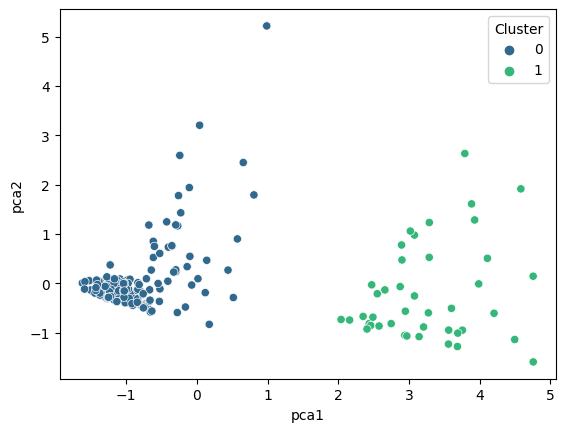

In [591]:
# Hacemos clusterizacion con 2 clusters

kmeans = KMeans(n_clusters=2, random_state=42)

df['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Hacemos pca para visualizar

pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_cluster_scaled)

df_pca = pd.DataFrame(data=df_pca, columns=['pca1', 'pca2'])

df_pca['Cluster'] = df['Cluster']

sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=df_pca, palette='viridis');

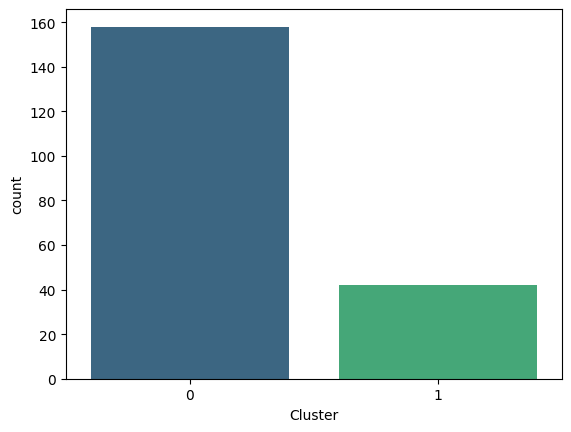

In [596]:
# Countplot para ver cuantos individuos hay en cada cluster

sns.countplot(x='Cluster', data=df, palette='viridis');

In [597]:
df_cluster_scaled

,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value
0,-0.720009,-0.522735,0.147033,-0.375293
1,-0.658177,-0.462916,0.074936,-0.475304
2,-0.659498,-0.701852,-0.566859,-0.536959
3,0.974651,1.491189,1.726347,1.857648
4,0.464171,-0.321118,1.320545,-0.452042
...,...,...,...,...
195,-0.540345,-0.579726,-0.389593,-0.555265
196,0.539342,1.750823,2.658737,2.161469
197,-0.649161,-0.743927,-0.975513,-0.498194
198,-0.471191,-0.657356,0.146099,-0.542794


In [645]:
# Hacemos clusterizacion con 4 clusters

kmeans = KMeans(n_clusters=4, random_state=42)

df_cluster_scaled['Cluster'] = kmeans.fit_predict(df_cluster_scaled)



c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [646]:
df['Cluster_4_2'] = df_cluster_scaled['Cluster']

In [702]:
# Graficar productos favoritos por cluster

fig = px.histogram(df, x='Cluster_4_2', color='CategoríaProductoFavorito', barmode='group')

fig.show()

In [642]:
df_cluster_scaled['Cluster'].value_counts()

0    128
1     30
2     30
3     12
Name: Cluster, dtype: int64

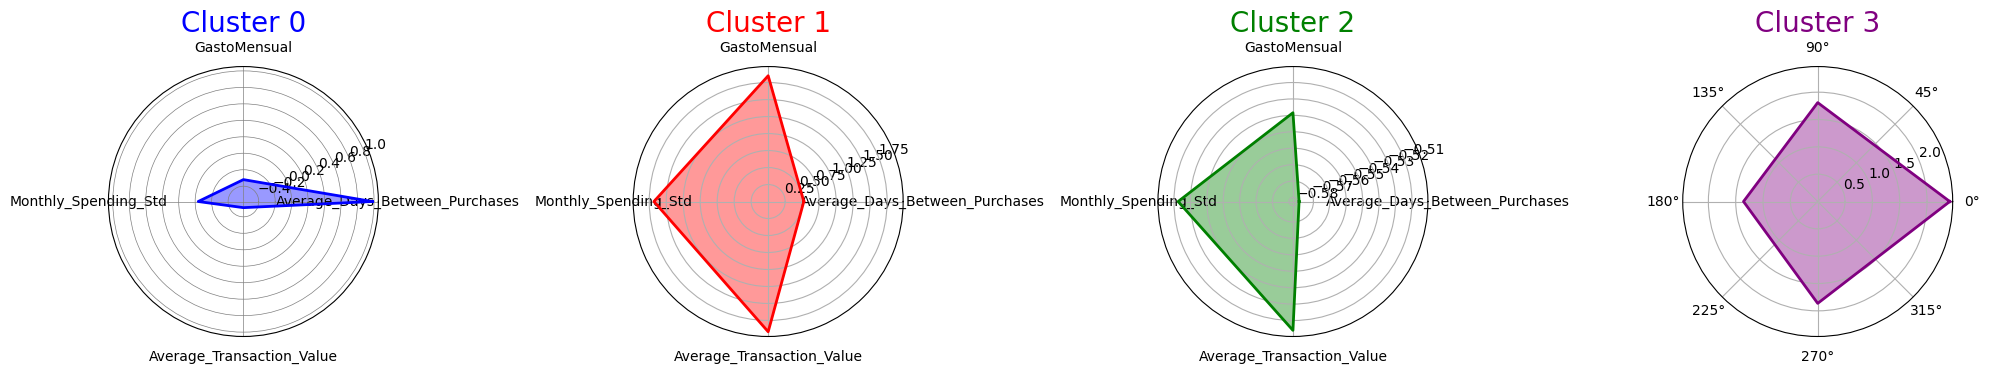

In [603]:
colors = ['blue', 'red', 'green', 'purple']

# Calculate the centroids of each cluster
cluster_centroids = df_cluster_scaled.groupby('Cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

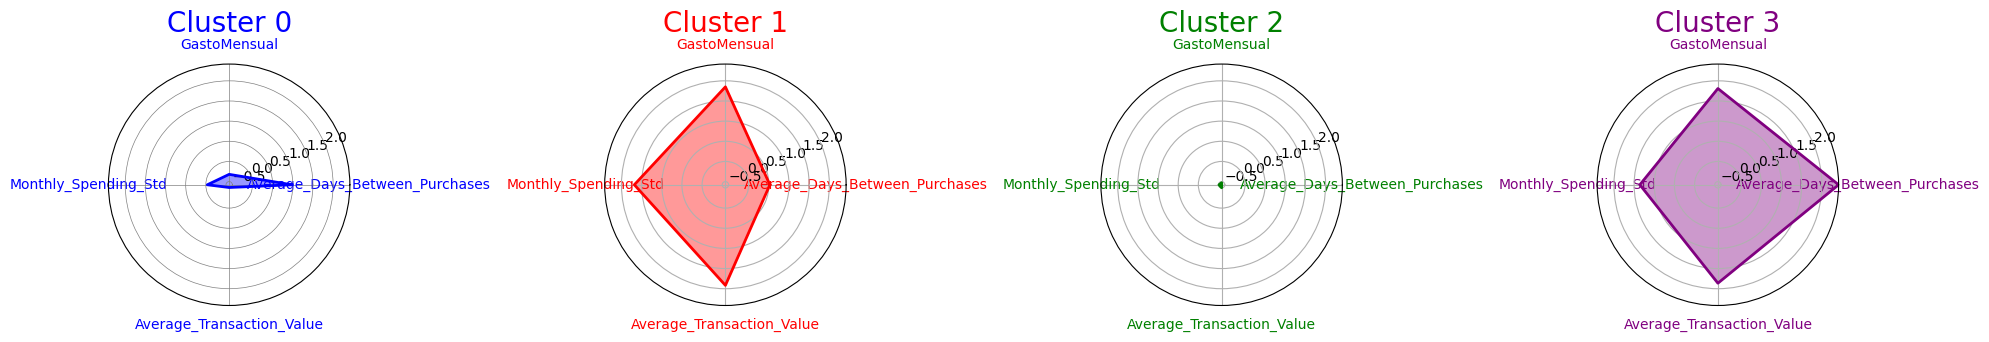

In [610]:
# Suponemos que df_cluster_scaled y 'Cluster' ya están definidos
colors = ['blue', 'red', 'green', 'purple']

# Calcular los centroides de cada cluster
cluster_centroids = df_cluster_scaled.groupby('Cluster').mean()

# Función para crear un gráfico radar
def create_radar_chart(ax, angles, data, color, cluster):
    # Plotear los datos y llenar el área
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Añadir un título
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

    # Ajustar los ticks y etiquetas del eje X
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1], color=color)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Calcular el ángulo de cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Completar el círculo

labels = np.concatenate((labels, [labels[0]]))

# Calcular los límites globales para normalizar la escala de los radares
global_min = cluster_centroids.min().min()
global_max = cluster_centroids.max().max()

# Inicializar la figura
fig, axes = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Crear un gráfico radar para cada cluster
for i, ax in enumerate(axes.flatten()):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Completar el círculo
    create_radar_chart(ax, angles, data, colors[i], i)
    ax.set_ylim(global_min, global_max)  # Normalizar la escala

# Añadir una rejilla
axes[0].grid(color='grey', linewidth=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [607]:
df['Cluster_4'] = df_cluster_scaled['Cluster']

In [609]:
df.groupby('Cluster_4').mean()

C:\Users\misla\AppData\Local\Temp\ipykernel_24252\2228784547.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Cluster,Latitud,Longitud
Cluster_4,,,,,,,
0,87.323728,128.690773,62.543128,23.751832,0.0,47.129593,5.961756
1,64.685830,604.473678,161.470136,803.848117,1.0,47.626241,3.953632
2,9.654459,82.996309,35.183153,26.115694,0.0,48.633253,7.276793
3,159.048136,595.399085,142.844834,786.754612,1.0,43.207841,-0.112713


In [605]:
df_cluster_scaled.groupby('Cluster').mean()

,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value
Cluster,,,,
0,0.978322,-0.319931,-0.037290,-0.511355
1,0.524492,1.850716,1.681113,1.916447
2,-0.578742,-0.528401,-0.512544,-0.503998
3,2.416208,1.809316,1.357584,1.863249


c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\misla\.pyenv\py

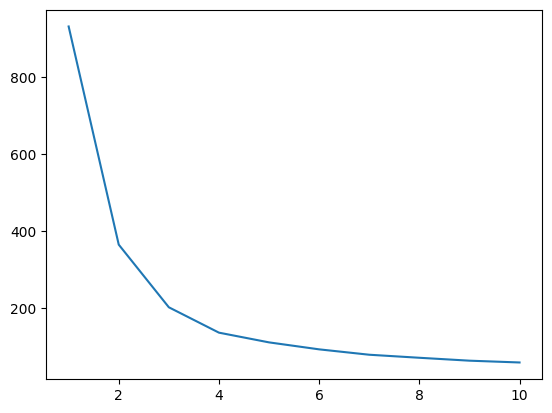

In [612]:
# Metodo del codo

inertia = []

for i in range(1, 11):

    kmeans = KMeans(n_clusters=i)

    kmeans.fit(df_cluster_scaled)

    inertia.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=inertia);

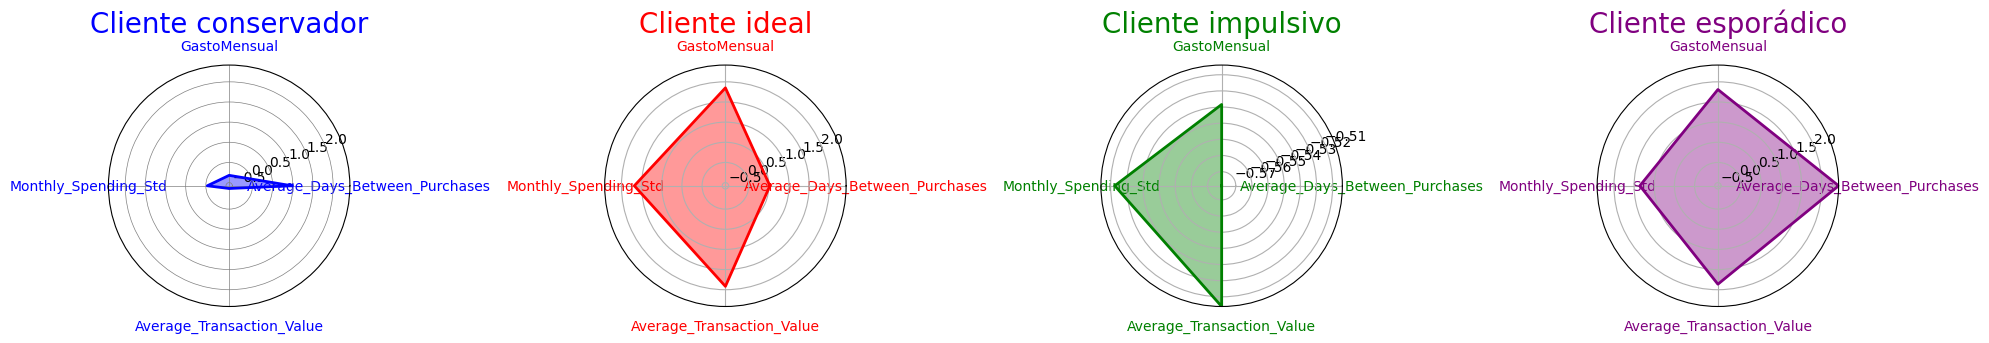

In [624]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['blue', 'red', 'green', 'purple']
tipo_cliente = ['Cliente conservador', 'Cliente ideal', 'Cliente impulsivo', 'Cliente esporádico']

# Calcular los centroides de cada cluster
cluster_centroids = df_cluster_scaled.groupby('Cluster').mean()

# Función para crear un gráfico radar
def create_radar_chart(ax, angles, data, color, cluster, global_min, global_max):
    # Plotear los datos y llenar el área
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    if cluster == 0:
        # Añadir un título
        ax.set_title(f'{tipo_cliente[cluster]}', size=20, color=color, y=1.1)
    
    elif cluster == 1:

        # Añadir un título

        ax.set_title(f'{tipo_cliente[cluster]}', size=20, color=color, y=1.1)
    
    elif cluster == 2:

        # Añadir un título

        ax.set_title(f'{tipo_cliente[cluster]}', size=20, color=color, y=1.1)
    
    elif cluster == 3:

        # Añadir un título

        ax.set_title(f'{tipo_cliente[cluster]}', size=20, color=color, y=1.1)

    # Ajustar los ticks y etiquetas del eje X
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1], color=color)

    # Establecer la escala del radar
    ax.set_ylim(global_min, global_max)  # Usar la escala global, ajustado si es el cluster 2

labels = np.array(cluster_centroids.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Completar el círculo
labels = np.concatenate((labels, [labels[0]]))

# Calcular los límites globales para normalizar la escala de los radares
global_min = cluster_centroids.min().min()
global_max = cluster_centroids.max().max()

# Calcular min y max para el cluster 2
cluster_2_min = cluster_centroids.loc[2].min()
cluster_2_max = cluster_centroids.loc[2].max()

# Inicializar la figura
fig, axes = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=4)

# Crear un gráfico radar para cada cluster
for i, ax in enumerate(axes.flatten()):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Completar el círculo
    if i == 2:
        create_radar_chart(ax, angles, data, colors[i], i, cluster_2_min, cluster_2_max)
    else:
        create_radar_chart(ax, angles, data, colors[i], i, global_min, global_max)

# Añadir una rejilla
axes[0].grid(color='grey', linewidth=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Salvar figura

fig.savefig('img/radar_chart.png')


In [627]:
# Counplot de productos favoritos por cluster



ValueError: Value of 'facet_col' is not the name of a column in 'data_frame'. Expected one of ['Variable', 'Value'] but received: Cluster_4

Error in callback <function flush_figures at 0x000002E09ADAC280> (for post_execute):


KeyboardInterrupt: 

In [713]:
df_cluster_scaled = pd.read_csv('datasets/Data_Reducida_Final_Cluster_Scaled.csv')

In [714]:
df_cluster_scaled['Cluster'] = kmeans.predict(df_cluster_scaled)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\base.py:402: UserWarning:

X has feature names, but KMeans was fitted without feature names



In [716]:
cluster_4 = pd.read_csv('datasets/Cluster_4.csv')

In [718]:
cluster_4['Cluster_4']

0      2
1      2
2      2
3      1
4      0
      ..
195    2
196    1
197    2
198    2
199    2
Name: Cluster_4, Length: 200, dtype: int64

In [695]:
df_cluster_scaled

,Average_Days_Between_Purchases,GastoMensual,Monthly_Spending_Std,Average_Transaction_Value,Cluster
0,-0.720009,-0.522735,0.147033,-0.375293,0
1,-0.658177,-0.462916,0.074936,-0.475304,0
2,-0.659498,-0.701852,-0.566859,-0.536959,0
3,0.974651,1.491189,1.726347,1.857648,1
4,0.464171,-0.321118,1.320545,-0.452042,0
...,...,...,...,...,...
195,-0.540345,-0.579726,-0.389593,-0.555265,0
196,0.539342,1.750823,2.658737,2.161469,1
197,-0.649161,-0.743927,-0.975513,-0.498194,0
198,-0.471191,-0.657356,0.146099,-0.542794,0


In [715]:
fig = px.histogram(df_cluster_scaled, x='Cluster', color=df['CategoríaProductoFavorito'], barmode='group')

fig.show()

In [720]:
cluster_4

,Cluster_4,CategoríaProductoFavorito
0,2,Moda
1,2,Deporte
2,2,Hogar
3,1,Electrónica
4,0,Moda
...,...,...
195,2,Moda
196,1,Moda
197,2,Deporte
198,2,Deporte


In [725]:
fig = px.histogram(df_cluster_scaled, x='Cluster', color=df['CategoríaProductoFavorito'], barmode='group')

fig.show()

In [724]:
fig = px.histogram(cluster_4, x='Cluster_4', color='CategoríaProductoFavorito', barmode='group')

fig.show()